In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
# Load the used_cars dataset
used_cars_df = pd.read_csv('../data/used_cars.csv')

In [3]:
used_cars_df

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,1548,2020 Hyundai Creta SX Opt Diesel AT BSVI,Aug-20,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020,1493.00,11345.0,11345.0,250.0,17.41
1549,1549,2022 Renault KWID 1.0 RXL Opt BSVI,2022,Third Party insurance,Petrol,5,10000,999 cc,2022,Power Steering,999.00,6706.0,6706.0,91.0,3.98
1550,1550,2017 Honda WR-V i-VTEC S,Jun-17,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,1199.0,887.0,5.85
1551,1551,2018 Volkswagen Polo 1.0 MPI Comfortline,May-18,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,999.0,75.0,4.75


In [4]:
used_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1553 non-null   int64  
 1   car_name            1553 non-null   object 
 2   registration_year   1553 non-null   object 
 3   insurance_validity  1553 non-null   object 
 4   fuel_type           1553 non-null   object 
 5   seats               1553 non-null   int64  
 6   kms_driven          1553 non-null   int64  
 7   ownsership          1553 non-null   object 
 8   transmission        1553 non-null   object 
 9   manufacturing_year  1553 non-null   object 
 10  mileage(kmpl)       1550 non-null   float64
 11  engine(cc)          1550 non-null   float64
 12  max_power(bhp)      1550 non-null   float64
 13  torque(Nm)          1549 non-null   float64
 14  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 182.1+

## Continuation

We're now going to build upon the first lab of the week by now introucing multiple linear regression in sklearn.

We'll begin by pretty much the same EDA and cleaning as the other lab, with some extra steps (that you should've done in previous lab's tasks) - so you can simply follow along here.

## Exploratory data analysis (EDA) and data cleaning

The target for our regression problem here is the column *price*. 

Each row represent the characteristics of a car, and the corresponding sales price of said car. We are free to choose which of the available features to fit a model to, and try to predict the target with.

It's generally essential that we use our wits and domain expertise to pick and engineer good features for our model. Bad features will produce a bad model, with poor predictie power. In other word, a useless model.

**Remove a redundant column**

In [5]:
# remove the first column which looks like a copy of the index column

columns_to_keep = used_cars_df.columns[1:]
print(columns_to_keep)

Index(['car_name', 'registration_year', 'insurance_validity', 'fuel_type',
       'seats', 'kms_driven', 'ownsership', 'transmission',
       'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)', 'price(in lakhs)'],
      dtype='object')


In [6]:
used_cars_df = used_cars_df[columns_to_keep]

**Keep only numerical columns, for now**

Many machine learning models require that the input are all numerical (since you can't do mathematic operations with anything else), and it is therefore essential that (when using models with that requirement) make sure that the data satisfies that condition.

Note that there are ways to transform any given column into numericals that we can work with, but let's hold on with that for now and only keep the features that already are.

In [7]:
used_cars_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1553 non-null   object 
 1   registration_year   1553 non-null   object 
 2   insurance_validity  1553 non-null   object 
 3   fuel_type           1553 non-null   object 
 4   seats               1553 non-null   int64  
 5   kms_driven          1553 non-null   int64  
 6   ownsership          1553 non-null   object 
 7   transmission        1553 non-null   object 
 8   manufacturing_year  1553 non-null   object 
 9   mileage(kmpl)       1550 non-null   float64
 10  engine(cc)          1550 non-null   float64
 11  max_power(bhp)      1550 non-null   float64
 12  torque(Nm)          1549 non-null   float64
 13  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 170.0+ KB


In [8]:
used_cars_df = used_cars_df.select_dtypes(include=['int64', 'float64'])

used_cars_df

,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,5,56000,7.81,2996.0,2996.0,333.0,63.75
1,5,30615,17.40,999.0,999.0,9863.0,8.99
2,5,24000,20.68,1995.0,1995.0,188.0,23.75
3,5,18378,16.50,1353.0,1353.0,13808.0,13.56
4,5,44900,14.67,1798.0,1798.0,17746.0,24.00
...,...,...,...,...,...,...,...
1548,5,35000,1493.00,11345.0,11345.0,250.0,17.41
1549,5,10000,999.00,6706.0,6706.0,91.0,3.98
1550,5,49000,17.50,1199.0,1199.0,887.0,5.85
1551,5,40000,18.78,999.0,999.0,75.0,4.75


**Deal with missing data**

Let's try to find and mitigate missing data. Note that whether to remove data points is a very sensitive decision, and should be carefully considered. 

Augmenting and fixing the data is a better alternative, if the time to do so is available. 

All changes we do to the training data *will* affect our model's performance, either insignificantly or significantly - depending on the changes we've made, and to what extent.

In [9]:
# check for null-data

used_cars_df.isnull().sum()

seats              0
kms_driven         0
mileage(kmpl)      3
engine(cc)         3
max_power(bhp)     3
torque(Nm)         4
price(in lakhs)    0
dtype: int64

In [10]:
used_cars_df = used_cars_df.dropna().reset_index(drop=True)

used_cars_df.isnull().sum()

seats              0
kms_driven         0
mileage(kmpl)      0
engine(cc)         0
max_power(bhp)     0
torque(Nm)         0
price(in lakhs)    0
dtype: int64

**Dealing with unreasonable data**

Usually, we have to spend considerable time to just clean the data and get rid of crap that has nested it's way into it.

Crap in data is very common in real life.

Let's begin by trying to understand the price column a bit better.

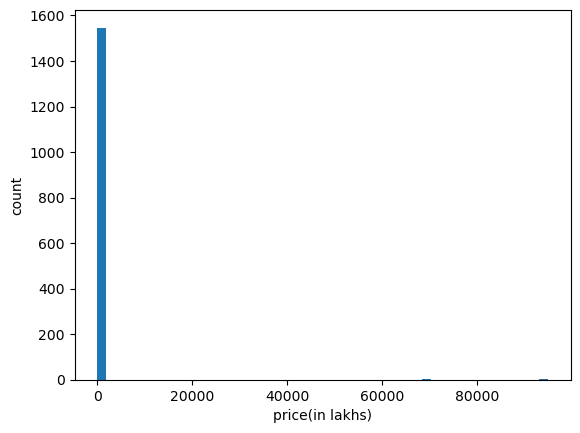

In [11]:
plt.hist(used_cars_df['price(in lakhs)'], bins=50);
plt.xlabel('price(in lakhs)');
plt.ylabel('count');

That's strange, it looks like there are a few cars that are extremely expensive. This is not incorrect per se, but let's look deeper.

In [12]:
used_cars_df[used_cars_df['price(in lakhs)']>100]

,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
173,5,66717,1196.0,70.0,70.0,102.0,70000.0
193,5,66717,1196.0,70.0,70.0,102.0,70000.0
1273,5,44002,19.7,796.0,796.0,463.0,95000.0


Ok, so we have 3 records of cars that looks to suspicous.

Since Ali has been in India, he knows that 1 lakh is a common indian measure that means one hundred thousand (indian rupees, in this case).

70000 lakhs is therefore 70000 * 100.000 = 7000000000 (indian rupees).

Converting this to Swedish currency we get 877447200 SEK. Not reasonably at all. 

Let's just remove these records for simplicity, and plot again

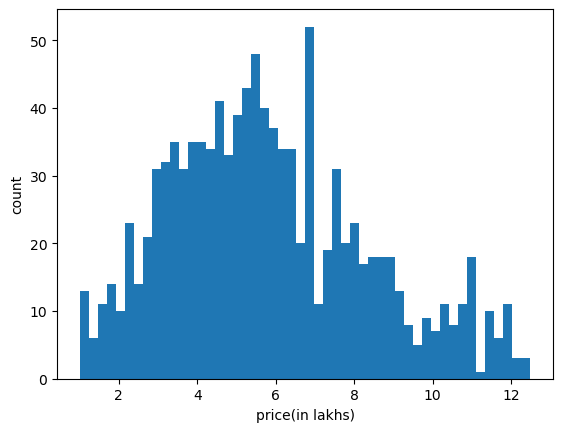

In [13]:
used_cars_df = used_cars_df[used_cars_df['price(in lakhs)']<12.5].reset_index(drop=True)

plt.hist(used_cars_df['price(in lakhs)'], bins=50);

plt.xlabel('price(in lakhs)');
plt.ylabel('count');

Ah, now it looks much more realistic!

Ok, great. Let's also take a look at kms_driven

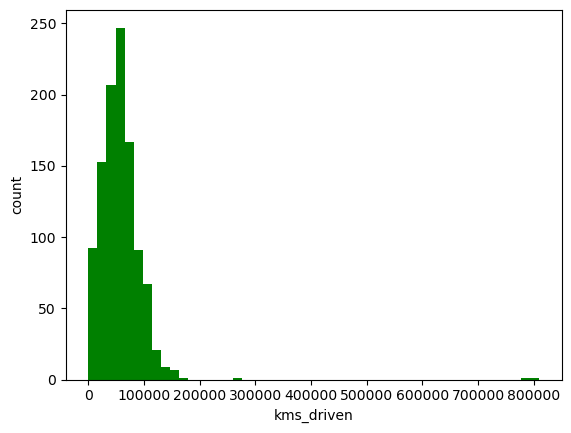

In [14]:
plt.hist(used_cars_df['kms_driven'], bins=50, color='green');

plt.xlabel('kms_driven');
plt.ylabel('count');

Well, this also looks a little suspicious. Perhaps?

In [15]:
used_cars_df[used_cars_df['kms_driven']>150000]

,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
675,5,790000,18.15,998.0,998.0,11835.0,9.75
709,5,810000,21.70,1498.0,1498.0,9896.0,9.00
941,7,176000,12.80,2494.0,2494.0,102.0,4.40
962,7,260000,12.80,2494.0,2494.0,102.0,6.25


Ok, so there are only 6 cars that have droven over 150.000 kms. Let's remove them, since they deviate in too much in values from our other values, and thus much deteroriate the models performance.

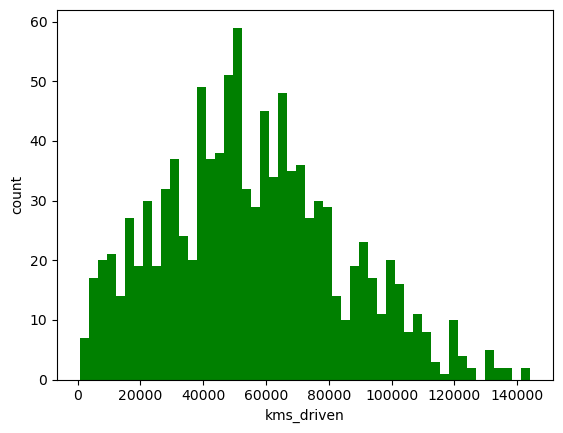

In [16]:
used_cars_df = used_cars_df[used_cars_df['kms_driven']<150000].reset_index(drop=True)

plt.hist(used_cars_df['kms_driven'], bins=50, color='green');

plt.xlabel('kms_driven');
plt.ylabel('count');

Remember, we now don't have any cars with high mileage in our training data at all. This is perfectly fine, but you should **not** try to use this resulting model to predict the price of cars with high mileage!

Let's look at kmpl now. This means kilometers per liter. What are reasonable values for this, do you think?

(array([  6.,   2.,   3.,  13.,   6.,  14.,  22.,  49.,  70., 126., 190.,
         64., 113.,  87.,  47.,  23.,  36.,  16.,   7.,  14.]),
 array([ 7.81  ,  8.8395,  9.869 , 10.8985, 11.928 , 12.9575, 13.987 ,
        15.0165, 16.046 , 17.0755, 18.105 , 19.1345, 20.164 , 21.1935,
        22.223 , 23.2525, 24.282 , 25.3115, 26.341 , 27.3705, 28.4   ]),
 <BarContainer object of 20 artists>)

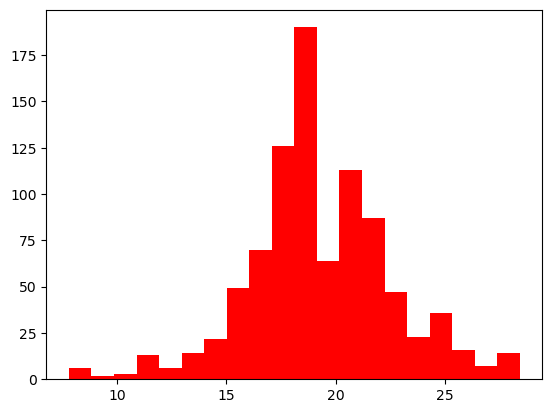

In [17]:
used_cars_df = used_cars_df[used_cars_df['mileage(kmpl)']<30].reset_index(drop=True)

plt.hist(used_cars_df['mileage(kmpl)'], bins = 20, color='red')

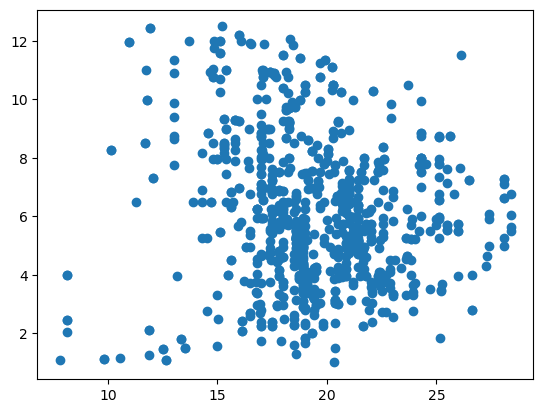

In [18]:
plt.scatter(used_cars_df['mileage(kmpl)'], used_cars_df['price(in lakhs)']);

If we look carefully, engine(cc) and max_power(bhp) is the same column!

In [19]:
used_cars_df

,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,5,30615,17.40,999.0,999.0,9863.0,8.99
1,5,42000,18.70,1199.0,1199.0,887.0,5.45
2,5,36739,18.90,1197.0,1197.0,8186.0,5.12
3,5,76000,15.80,1591.0,1591.0,1213.0,9.30
4,5,28783,17.00,1198.0,1198.0,1085.0,8.02
...,...,...,...,...,...,...,...
903,5,19446,18.20,1199.0,1199.0,887.0,6.50
904,7,26500,26.11,1462.0,1462.0,8663.0,11.50
905,5,49000,17.50,1199.0,1199.0,887.0,5.85
906,5,40000,18.78,999.0,999.0,75.0,4.75


In [20]:
used_cars_df = used_cars_df.drop(columns=['max_power(bhp)'])

In [21]:
used_cars_df

,seats,kms_driven,mileage(kmpl),engine(cc),torque(Nm),price(in lakhs)
0,5,30615,17.40,999.0,9863.0,8.99
1,5,42000,18.70,1199.0,887.0,5.45
2,5,36739,18.90,1197.0,8186.0,5.12
3,5,76000,15.80,1591.0,1213.0,9.30
4,5,28783,17.00,1198.0,1085.0,8.02
...,...,...,...,...,...,...
903,5,19446,18.20,1199.0,887.0,6.50
904,7,26500,26.11,1462.0,8663.0,11.50
905,5,49000,17.50,1199.0,887.0,5.85
906,5,40000,18.78,999.0,75.0,4.75


Alright, looks like we have a good range with a good amount of samples

## Linear Regression

In [22]:
used_cars_df.head(2)

,seats,kms_driven,mileage(kmpl),engine(cc),torque(Nm),price(in lakhs)
0,5,30615,17.4,999.0,9863.0,8.99
1,5,42000,18.7,1199.0,887.0,5.45


Alright, now let's try to use all our features to predict our target, the sales price.

We'll use a linear model for this. In other words, We'll now assume that we can model

$$ price = w_5 \cdot (seats) + w_4 \cdot (kms\ driven) + w_3 \cdot (mileage(kmpl)) + w_2 \cdot (engine(cc)) + w_1 \cdot (torque(Nm)) + w_0$$

**note** That we'll have a difficult time doing any plots here, since our eyes are limited to 3D while have 5 features

In [23]:
X, y = used_cars_df.drop(columns=['price(in lakhs)', 'seats']).values, used_cars_df['price(in lakhs)'].values

In [24]:
# all our features are here now

print(X.shape)

# our target column has the same shape as before

print(y.shape)

(908, 4)
(908,)


In [25]:
# We see that our features X has the required shape format, but the target y doesn't. So let's fix that now

y = y.reshape(-1,1)

print(y.shape)

(908, 1)


Train/test split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # set a random state, so we can reproduce our results

print('Train set:')
print('X:', len(X_train))
print('y:', len(y_train), end='\n\n')

print('Test set:')
print('X:', len(X_test))
print('y:', len(y_test))

Train set:
X: 726
y: 726

Test set:
X: 182
y: 182


In [27]:
# import a linear regression model and the MSE-metric from sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

multiple_linear_regression_model = LinearRegression()     # note that this model has inate support to handle several features!

In [28]:
# train the model

multiple_linear_regression_model.fit(X_train, y_train);

In [29]:
# print the weights of the trained model

print(multiple_linear_regression_model.intercept_)
print(multiple_linear_regression_model.coef_)

[4.22693321]
[[-1.68133543e-05  1.55726073e-02  1.88027542e-03 -2.24657384e-06]]


In [30]:
# predictions for both the train and test set

y_train_hat = multiple_linear_regression_model.predict(X_train)
y_test_hat = multiple_linear_regression_model.predict(X_test)

In [31]:
# calculate MSE for both sets

print('Train:')
print(f'MSE: {mean_squared_error(y_train, y_train_hat)}')

print('Test:')
print(f'MSE: {mean_squared_error(y_test, y_test_hat)}')

Train:
MSE: 5.337602938395203
Test:
MSE: 7.275323257690886


Text(0, 0.5, 'y_test_hat')

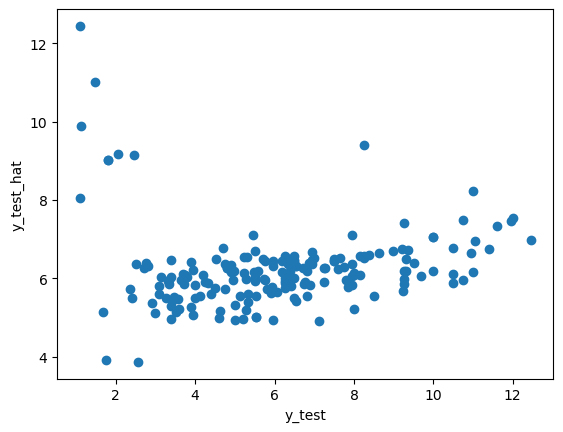

In [32]:
plt.scatter(y_test, y_test_hat);
plt.xlabel('y_test')
plt.ylabel('y_test_hat')


How does this result compare to the regression models you built using only one feature in the previous lab?

---

## Challanges

**Task 1**

Try re-training the multiple linear regression model above, each time removing a single feature. I.e., you should train 5 models with the following features respectively:

1. $x_1, x_2, x_3, x_4$

2. $x_1, x_2, x_3, x_5$

3. $x_1, x_2, x_4, x_5$

4. $x_1, x_3, x_4, x_5$

5. $x_2, x_3, x_4, x_5$

Does any of the above combinations of features yield a better performing model? Or perhaps our efforts to model used care prices using only these features from this specific dataset is simply futile...

[4.22693321]
[[-1.68133543e-05  1.55726073e-02  1.88027542e-03 -2.24657384e-06]]
Train:
MSE: 5.337602938395203
Test:
MSE: 7.275323257690886


Text(0, 0.5, 'y_test_hat')

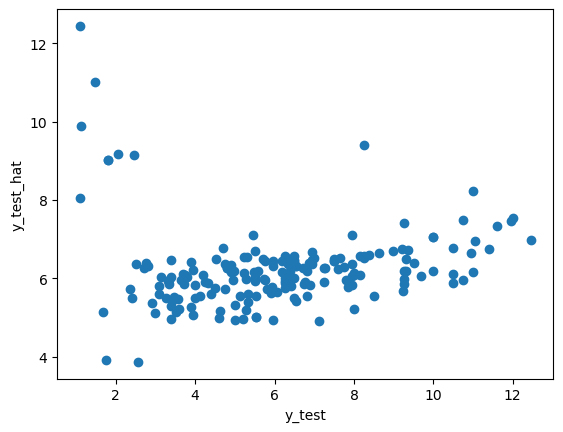

In [43]:
#1

X, y = used_cars_df.drop(columns=["price(in lakhs)", "seats"]).values, used_cars_df["price(in lakhs)"].values
y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
multiple_linear_regression_model.fit(X_train, y_train);
print(multiple_linear_regression_model.intercept_)
print(multiple_linear_regression_model.coef_)

y_train_hat = multiple_linear_regression_model.predict(X_train)
y_test_hat = multiple_linear_regression_model.predict(X_test)

print('Train:')
print(f'MSE: {mean_squared_error(y_train, y_train_hat)}')

print('Test:')
print(f'MSE: {mean_squared_error(y_test, y_test_hat)}')

plt.scatter(y_test, y_test_hat);
plt.xlabel('y_test')
plt.ylabel('y_test_hat')

[1.33635906]
[[ 5.28467080e-01  1.07773890e-03  1.53933275e-03 -2.51838322e-06]]
Train:
MSE: 5.50927414876485
Test:
MSE: 6.820207388299208


Text(0, 0.5, 'y_test_hat')

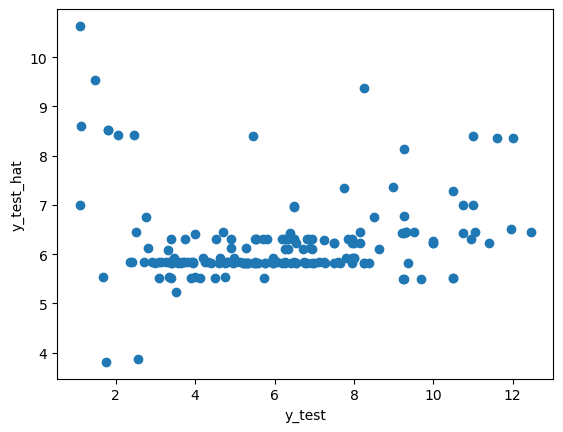

In [44]:
#2

X, y = used_cars_df.drop(columns=["price(in lakhs)", "kms_driven"]).values, used_cars_df["price(in lakhs)"].values
y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
multiple_linear_regression_model.fit(X_train, y_train);
print(multiple_linear_regression_model.intercept_)
print(multiple_linear_regression_model.coef_)

y_train_hat = multiple_linear_regression_model.predict(X_train)
y_test_hat = multiple_linear_regression_model.predict(X_test)

print('Train:')
print(f'MSE: {mean_squared_error(y_train, y_train_hat)}')

print('Test:')
print(f'MSE: {mean_squared_error(y_test, y_test_hat)}')

plt.scatter(y_test, y_test_hat);
plt.xlabel('y_test')
plt.ylabel('y_test_hat')

[1.9600682]
[[ 5.69104742e-01 -1.70333079e-05  1.64344341e-03 -2.20322713e-06]]
Train:
MSE: 5.277496989532137
Test:
MSE: 6.831692087662375


Text(0, 0.5, 'y_test_hat')

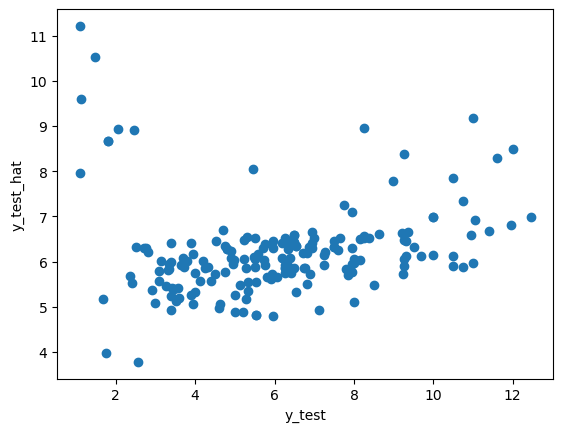

In [45]:
#3

X, y = used_cars_df.drop(columns=["price(in lakhs)", "mileage(kmpl)"]).values, used_cars_df["price(in lakhs)"].values
y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
multiple_linear_regression_model.fit(X_train, y_train);
print(multiple_linear_regression_model.intercept_)
print(multiple_linear_regression_model.coef_)

y_train_hat = multiple_linear_regression_model.predict(X_train)
y_test_hat = multiple_linear_regression_model.predict(X_test)

print('Train:')
print(f'MSE: {mean_squared_error(y_train, y_train_hat)}')

print('Test:')
print(f'MSE: {mean_squared_error(y_test, y_test_hat)}')

plt.scatter(y_test, y_test_hat);
plt.xlabel('y_test')
plt.ylabel('y_test_hat')

[4.4961549]
[[ 8.07241379e-01 -1.52904998e-05 -8.32707966e-02 -2.29014066e-06]]
Train:
MSE: 5.530989618819821
Test:
MSE: 5.8844980474283375


Text(0, 0.5, 'y_test_hat')

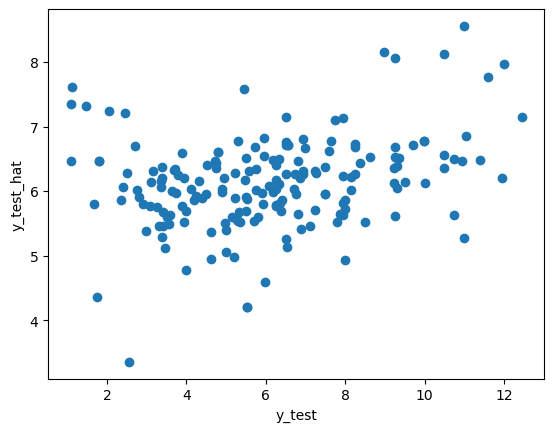

In [46]:
#4

X, y = used_cars_df.drop(columns=["price(in lakhs)", "engine(cc)"]).values, used_cars_df["price(in lakhs)"].values
y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
multiple_linear_regression_model.fit(X_train, y_train);
print(multiple_linear_regression_model.intercept_)
print(multiple_linear_regression_model.coef_)

y_train_hat = multiple_linear_regression_model.predict(X_train)
y_test_hat = multiple_linear_regression_model.predict(X_test)

print('Train:')
print(f'MSE: {mean_squared_error(y_train, y_train_hat)}')

print('Test:')
print(f'MSE: {mean_squared_error(y_test, y_test_hat)}')

plt.scatter(y_test, y_test_hat);
plt.xlabel('y_test')
plt.ylabel('y_test_hat')

[1.40368639]
[[ 5.83006841e-01 -1.77633385e-05  1.95373463e-02  1.72524476e-03]]
Train:
MSE: 5.332566982343195
Test:
MSE: 6.9574525775811145


Text(0, 0.5, 'y_test_hat')

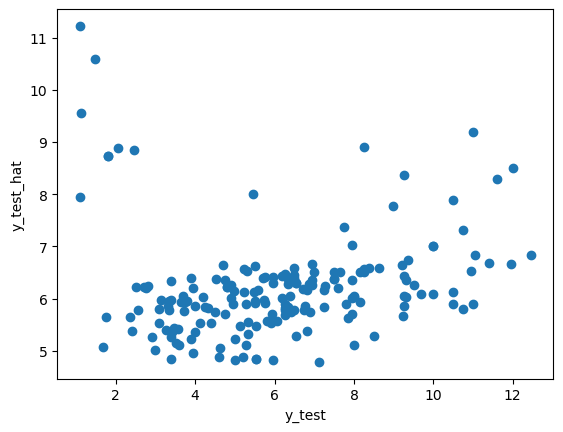

In [47]:
#5

X, y = used_cars_df.drop(columns=["price(in lakhs)", "torque(Nm)"]).values, used_cars_df["price(in lakhs)"].values
y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
multiple_linear_regression_model.fit(X_train, y_train);
print(multiple_linear_regression_model.intercept_)
print(multiple_linear_regression_model.coef_)

y_train_hat = multiple_linear_regression_model.predict(X_train)
y_test_hat = multiple_linear_regression_model.predict(X_test)

print('Train:')
print(f'MSE: {mean_squared_error(y_train, y_train_hat)}')

print('Test:')
print(f'MSE: {mean_squared_error(y_test, y_test_hat)}')

plt.scatter(y_test, y_test_hat);
plt.xlabel('y_test')
plt.ylabel('y_test_hat')